# Monthly Electricity Statistics

## Cargue Dataset

In [16]:
# importar liberarias

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [62]:
# Se carga el DataFrame y se muestra la informacion de las columnas

df = pd.read_csv("data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181915 entries, 0 to 181914
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   COUNTRY             181915 non-null  object 
 1   CODE_TIME           181915 non-null  object 
 2   TIME                181915 non-null  object 
 3   YEAR                181915 non-null  int64  
 4   MONTH               181915 non-null  int64  
 5   MONTH_NAME          181915 non-null  object 
 6   PRODUCT             181915 non-null  object 
 7   VALUE               181915 non-null  float64
 8   DISPLAY_ORDER       181915 non-null  int64  
 9   yearToDate          181915 non-null  float64
 10  previousYearToDate  164810 non-null  float64
 11  share               181915 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 16.7+ MB


In [63]:
df.head()

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728,1,16471.891,NaN,0.047771
1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469,2,4940.909,NaN,0.019744
2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216,3,908.238,NaN,0.002373
3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083,4,0.996,NaN,0.000004
4,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,19289.730,7,214302.969,NaN,0.930108


## Limpieza de datos

In [64]:
#modificar Valores para manejar 2 decimales
# Aplicar IQR a VALUE

In [65]:
# Quitar duplicados

df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181915 entries, 0 to 181914
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   COUNTRY             181915 non-null  object 
 1   CODE_TIME           181915 non-null  object 
 2   TIME                181915 non-null  object 
 3   YEAR                181915 non-null  int64  
 4   MONTH               181915 non-null  int64  
 5   MONTH_NAME          181915 non-null  object 
 6   PRODUCT             181915 non-null  object 
 7   VALUE               181915 non-null  float64
 8   DISPLAY_ORDER       181915 non-null  int64  
 9   yearToDate          181915 non-null  float64
 10  previousYearToDate  164810 non-null  float64
 11  share               181915 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 16.7+ MB


In [66]:
# Codificar el pais.

# Crear un diccionario de mapeo para codificar los países
pais_codificado = {pais: idx for idx, pais in enumerate(df['COUNTRY'].unique(), start=1)}

# Reemplazar los nombres de los países con los códigos numéricos
df['pais_codificado'] = df['COUNTRY'].map(pais_codificado)

In [67]:
# Agrupar por la columna 'PRODUCT' y calcular la suma del VALUE para cada PRODUCT
df_agrupado = df.groupby('PRODUCT')['VALUE'].sum().reset_index()

pd.set_option('display.float_format', lambda x: '%.2f' % x)

df_sorted = df_agrupado.sort_values(by='VALUE', ascending=False)

df_sorted.head(20)

,PRODUCT,VALUE
3,Electricity supplied,565262574.11
11,Net electricity production,564874336.09
5,Final consumption,522670059.06
12,Non-renewables,418686166.13
22,Total combustible fuels,332979390.05
6,Fossil fuels,319942106.34
9,Low carbon,246822067.84
0,Coal,155367443.69
10,Natural gas,146998372.67
20,Renewables,146185701.80


## Graficos

### Mapa de Calor

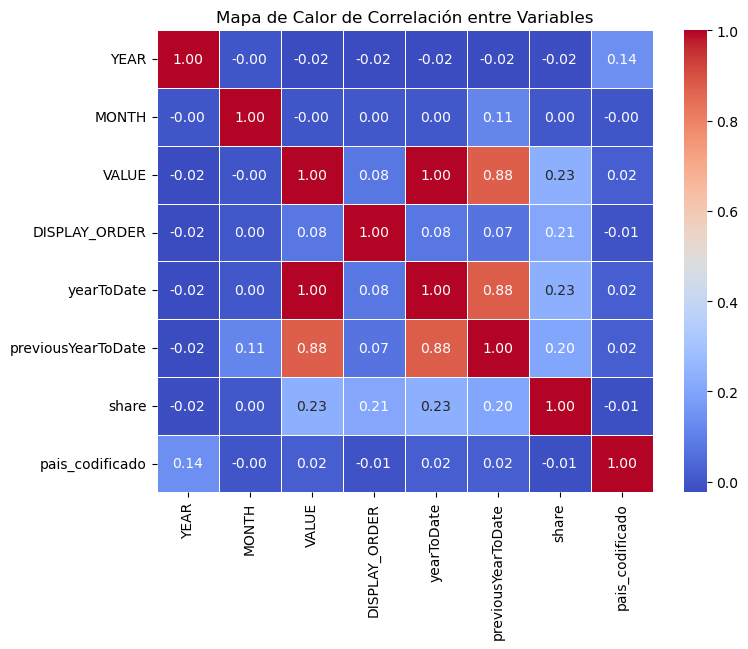

In [68]:
# Calcular la matriz de correlación
corr = df.corr(numeric_only=True)

# Crear el mapa de calor
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Agregar título y mostrar el gráfico
plt.title('Mapa de Calor de Correlación entre Variables')
plt.show()

In [ ]:
df_filtrado = df[(df['COUNTRY'] == 'Australia') & (df['PRODUCT'] == 'Solar') & (df['YEAR'] == 2020) & ((df['MONTH'] == 2) | (df['MONTH'] == 1)) ]
df_filtrado

In [ ]:
valueYear = df_filtrado['VALUE'].sum()
valueYear

In [ ]:
df_filtrado2021 = df[(df['COUNTRY'] == 'Australia') & (df['PRODUCT'] == 'Hydro') & (df['YEAR'] == 2021) & ((df['MONTH'] == 2) | (df['MONTH'] == 1))]
df_filtrado2021

In [ ]:
valueYear2021 = df_filtrado2021['VALUE'].sum()

In [ ]:
valueYear2021

In [ ]:
valueYear

In [ ]:
valueFinal = valueYear2021 + valueYear

In [ ]:
valueFinal

In [ ]:
df_filtrado2019 = df[(df['COUNTRY'] == 'Australia') & (df['PRODUCT'] == 'Hydro') & (df['YEAR'] == 2020)]
df_filtrado2019['VALUE'].sum()

In [ ]:
df_filtrado2021 = df[(df['COUNTRY'] == 'Australia') & (df['PRODUCT'] == 'Natural gas')]
df_filtrado2021

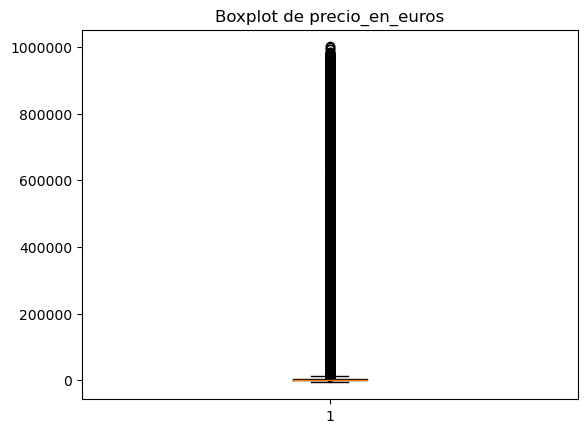

In [48]:
# Ajustar la escala del eje Y para mostrar números completos
plt.ticklabel_format(style='plain', axis='y')

# Boxplot con matplotlib
plt.boxplot(df['VALUE'])
plt.title('Boxplot de precio_en_euros')
plt.show()

In [49]:
df.describe()

,YEAR,MONTH,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
count,181915.000000,181915.000000,1.819150e+05,181915.000000,1.819150e+05,1.648100e+05,181915.000000
mean,2016.456818,6.498145,2.091292e+04,14.418410,2.509544e+05,1.382083e+05,0.289057
std,3.657532,3.452288,8.584724e+04,7.819235,1.026864e+06,6.383465e+05,0.427347
min,2010.000000,1.000000,-6.852344e+03,1.000000,-6.667000e+04,-6.667000e+04,-4.649269
25%,2013.000000,3.000000,6.685189e+01,8.000000,8.831870e+02,3.988967e+02,0.009907
50%,2017.000000,6.000000,7.663990e+02,15.000000,9.558855e+03,4.356565e+03,0.082530
75%,2020.000000,9.000000,4.989495e+03,21.000000,5.927517e+04,3.025087e+04,0.511302
max,2022.000000,12.000000,1.001529e+06,27.000000,1.082156e+07,1.082156e+07,5.649269


# Agrupar registros por tipo de energia